## Задача 3.4
Даны [результаты работы двух машинных переводчиков на небольших выборках переводов для разных языковых пар](data/mt).

Стандартная оценка качества перевода производится с использованием специальной метрики [BLEU](https://en.wikipedia.org/wiki/BLEU). (Реализовано [здесь](https://www.nltk.org/_modules/nltk/translate/bleu_score.html)).


Требуется опеделить:
* превосходит ли один переводчик в среднем по парам второй переводчик по переводу
* связано ли качество перевода для разных языковых пар для двух переводчиков?

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import SmoothingFunction
smoothie = SmoothingFunction().method1

In [2]:
pairs = ['de_en', 'en_kk', 'en_ru', 'ru_de', 'ru_kk']
scores = {key: [0,0]  for key in pairs}

In [3]:
for i, name in enumerate(pairs):
    files = {}
    for key in ['1', '2', 'gold']:
        with open('data/mt/'+ name +'_' + key + '.txt', 'r', encoding="utf-8") as f:
            files[key] = f.readlines()
    tokenized_files = {key: [word_tokenize(j) for j in files[key]] for key in ['1', '2', 'gold']}
    for translator in range(1,3):
        s = np.mean([sentence_bleu([tokenized_files[str(translator)][l]], tokenized_files['gold'][l], smoothing_function=smoothie) for l in range(len(tokenized_files['gold']))]) 
        scores[name][translator- 1] = s

In [4]:
print(f"сумма BLEU у первого: {np.sum([value[0] for key, value in scores.items()])}, второго: {np.sum([value[1] for key, value in scores.items()])}")
print()

сумма BLEU у первого: 0.5740902444312836, второго: 0.5957848702033133



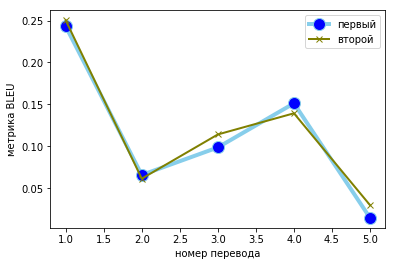

In [5]:
df=pd.DataFrame({'x': np.arange(1,6), 
                 'первый': [value[0] for key, value in scores.items()],
                 'второй': [value[1] for key, value in scores.items()]})
plt.plot( 'x', 'первый', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'второй', data=df, marker='x', color='olive', linewidth=2)
plt.ylabel('метрика BLEU')
plt.xlabel('номер перевода')
plt.legend()

Второй переводчик превзошел первого по BLEU, но на некоторых переводах первый был лучше. Чтобы ответить на вопрос, связано ли качество перевода для разных для переводчиков можно воспользоваться критерием знаков. Нулевая гипотеза: качество не связано.

In [6]:
st.wilcoxon([value[0] for key, value in scores.items()],
            [value[1] for key, value in scores.items()], 
                     alternative='two-sided')

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=4.0, pvalue=0.34523107177184)

Нельзя отвергнуть гипотезу, что качество перевода не связано с переводчиком